<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW7/ClusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
import seaborn as sns
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_genes = pd.read_csv("https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW7/kidpackgenes.csv", index_col=0)
df_genes= df_genes.reset_index(drop=True)
df_genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [3]:
df_genes.shape

(2603, 74)

In [4]:
df_genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,-0.074268,-0.005045,0.005219,-0.079438,-0.042794,0.015155,-0.059323,-0.039752,-0.087955,0.000902,-0.041196,-0.015011,-0.034671,-0.112678,-0.048054,-0.012752,-0.002154,-0.023367,-0.008875,-0.043155,-0.010581,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,0.493931,0.346347,0.331848,0.692972,0.428889,0.339398,0.380021,0.351449,0.455828,0.345493,0.362652,0.447326,0.540023,0.580710,0.496429,0.543310,0.465740,0.387973,0.397993,0.425933,0.403002,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,-0.378801,-0.212649,-0.179065,-0.506899,-0.275926,-0.144605,-0.309324,-0.234284,-0.332753,-0.210667,-0.261666,-0.280333,-0.321668,-0.392210,-0.350457,-0.324113,-0.252442,-0.238936,-0.230974,-0.293005,-0.216682,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,-0.238644,-0.206238,-0.265784,-0.261281,-0.256625,-0.422915,-0.212

# Check missing values

In [5]:
df_genes.isnull().values.any()

True

In [6]:
print("There are {} missing values in the entire dataframe".format(df_genes.isnull().sum().sum()))


There are 53 missing values in the entire dataframe


## Remove all the rows containing missing values

In [7]:
 df = df_genes.dropna(axis=0)
 df.shape

(2602, 74)

## Selecting five random columns from the dataframe and plot their distributions and pairwise correlation

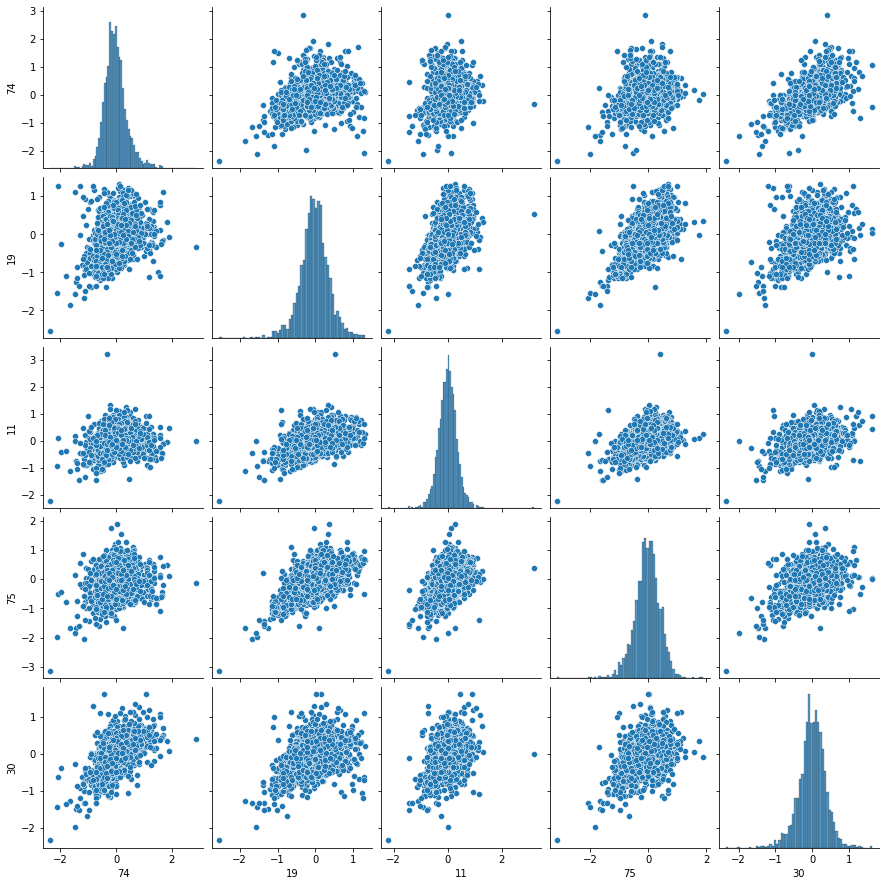

In [8]:
np.random.seed(5)
cols = df.columns[np.random.randint(1,74,5)]
sns.pairplot(df[cols])

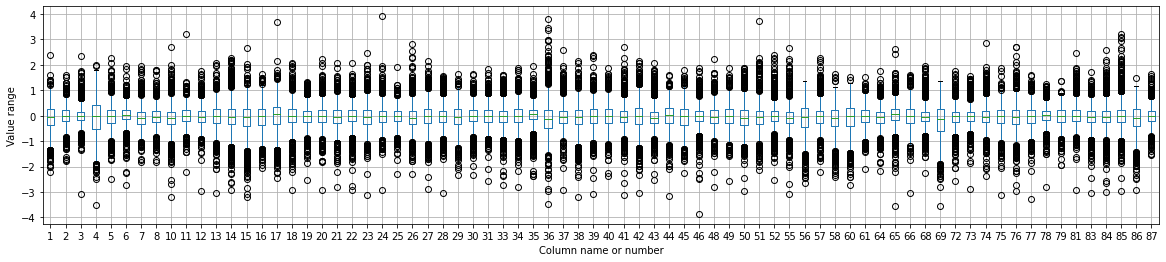

In [9]:
fig,axes = plt.subplots(figsize=(20,4))
df.boxplot(ax=axes);
axes.set_xlabel('Column name or number')
axes.set_ylabel('Value range');

In [23]:
scaledgenes = pd.DataFrame(skl.preprocessing.scale(df, axis=0))
scaledgenes.mean(0).to_numpy().round(2), scaledgenes.std(0).to_numpy().round(2)

(array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,
         0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,
         0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
         0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
        -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [27]:
scaledgenes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,-0.146019,-1.488856,0.514638,-0.353014,0.502572,0.029563,0.222502,0.604333,0.647998,0.075182,1.136687,0.907956,-0.127309,0.367495,-0.660243,0.534738,-0.276161,0.034742,-0.980446,-0.197406,0.609548,1.494984,0.115342,-0.097776,0.834808,1.425107,1.571905,-0.054503,0.299091,0.348216,1.390682,0.284985,0.501318,0.856694,-0.853848,0.161556,0.950363,-0.353100,-0.008300,-0.099195,1.091593,0.541688,-0.251869,0.967078,0.549274,0.234840,2.707725,-0.148490,0.059847,0.877376,0.023328,0.275269,0.358016,-0.277437,-0.337881,-0.092524,0.956724,0.783125,0.484408,-0.576192,0.126103,0.037952,0.444157,-0.211445,0.576660,-0.776721,-0.001318,-0.672957,0.202170,0.440209,0.045815,1.098020,0.436797,1.006906
1,-0.792728,0.464332,0.666898,-0.676048,0.195739,0.359141,0.427133,0.016276,1.292408,0.013869,1.202594,1.095210,0.055175,1.621696,-0.827387,0.027786,-0.505117,-0.289729,-1.158889,0.309853,-0.070339,1.428788,0.544404,-0.201160,1.240637,1.555996,2.044202,-0.508714,0.695053,-0.286004,0.170844,0.370791,0.487009,0.737470,-0.161089,0.446022,1.310643,-0.344948,0.516954,0.200795,1.657301,-0.017265,0.381959,1.143808,1.090641,0.120314,1.881579,-0.815878,0.153995,0.433791,-0.615950,0.081879,-0.234432,-1.120606,-0.312187,-0.542851,0.002609,1.110759,0.298254,-0.722362,0.043553,0.318469,-0.242917,-0.819484,0.846758,-1.021731,-0.420254,-0.644995,0.350828,0.073335,0.608766,0.923101,-0.749670,0.630622
2,-0.029854,-0.586855,-0.470565,-0.301764,-0.892364,0.311979,-0.100687,0.092237,0.916678,-0.646321,0.398565,0.209992,-0.259801,0.305572,-0.394290,-0.043692,-1.747101,-0.182220,-1.954691,-1.065694,-0.498056,0.655872,0.497126,-0.348993,-0.032556,0.983376,0.692545,0.268341,1.218127,-0.958493,-0.263409,-1.167418,0.474370,-0.031375,-1.650354,-1.340592,0.010389,-0.007276,-0.945628,-0.449924,0.179561,0.437077,0.774829,-0.135723,0.812693,-0.318086,1.081257,-0.815935,0.472055,0.667890,0.012390,-0.314736,0.303127,-0.074875,-0.016122,0.099233,0.208290,1.111159,0.205389,-1.414642,0.343176,-0.418678,-0.480002,0.389655,0.048375,-1.049329,-0.155712,-0.412715,0.133189,0.080352,-0.194740,-0.420867,-0.565212,-0.063473
3,-0.513189,-4.937272,0.191776,-0.128601,-0.999641,0.777537,-0.002835,-0.519828,1.637398,0.373869,1.581952,-0.210795,-0.266839,0.206770,-0.590421,-1.084528,-0.510219,0.852890,-0.642572,-0.144977,1.484118,0.590947,-0.848305,0.273840,0.316052,1.173312,0.770137,1.133725,0.310780,0.191313,0.250755,-0.376692,-0.929355,1.041450,-0.056358,-0.780719,1.613721,0.709560,0.717453,-0.226552,-0.092706,0.268279,-0.108837,0.489395,0.889698,2.291933,1.064483,0.337610,1.054762,0.053428,0.800454,0.168110,1.550840,0.715554,0.490909,-0.566964,0.485855,0.172965,0.319175,-0.046334,0.313694,0.235179,0.696623,-0.700702,0.397035,-0.265448,-0.371819,-0.755718,2.324671,-0.197438,-2.388543,-0.452573,0.862189,0.200050
4,-0.036661,-1.892565,0.213591,-0.818882,-0.007659,-0.074920,1.127750,-0.010928,-0.511103,0.335597,1.069383,0.665961,-0.079383,1.617300,-0.177465,-1.240288,-1.242240,0.156628,-0.245946,0.562178,0.526957,0.502980,0.161776,0.052103,0.468239,0.787042,1.167348,-0.225869,0.657280,-0.569612,1.601774,0.044756,0.101760,-1.378444,-0.602369,-0.207398,1.942259,-0.873132,0.878144,0.091284,0.975895,0.076618,1.044569,-0.257918,1.727517,0.998650,1.071057,-0.609384,0.283784,-0.462979,-0.427668,2.338521,0.045657,-0.703241,-0.081914,0.678818,0.224309,1.132434,1.636439,-1.854763,-0.679603,0.278083,2.058854,-1.064301,0.011097,1.052555,0.550454,-0.487088,0.311425,-0.083219,-0.569324,-1.012305,-1.139229,0.197174


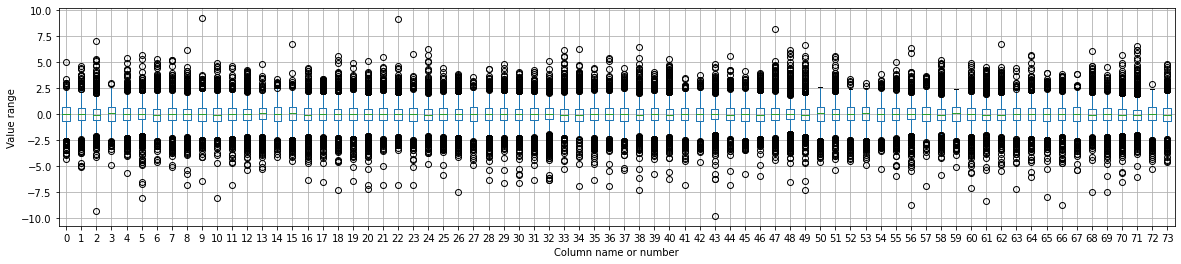

In [24]:
fig,axes = plt.subplots(figsize=(20,4))
scaledgenes.boxplot(ax=axes);
axes.set_xlabel('Column name or number')
axes.set_ylabel('Value range');

In [35]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)

In [36]:
twodproj = skl.manifold.TSNE(n_components=2, random_state=np.random.seed(5)).fit_transform(scaledgenes)
twodproj.shape

(2602, 2)

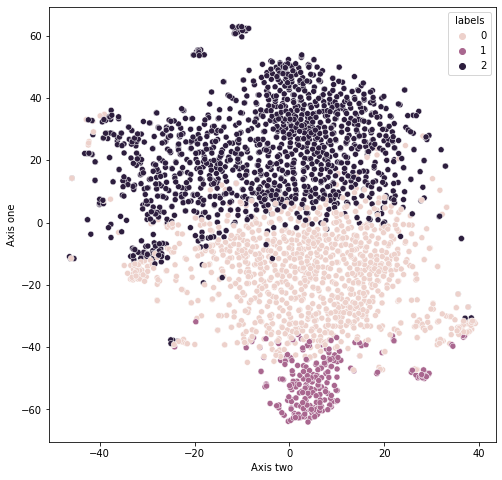

In [38]:
df_tsne = pd.DataFrame()
df_tsne['Axis one'] = twodproj[:,0]
df_tsne['Axis two'] = twodproj[:,1]
df_tsne['labels'] = geneclustersKM.labels_

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="Axis two", y="Axis one",
    hue='labels',
    data=df_tsne,
    legend="full",
    alpha=1.0
);

In [114]:
def edistance(x,center):
  """eucledian distance"""
  return np.sqrt(((x - center)**2).sum(axis=1))
def calcICVar(X, labels, model):
  n_clusters = np.unique(labels).shape[0] # for every cluster, i.e. for every different label
  print(n_clusters)
  icv = np.zeros(n_clusters) #create a container for the intraclustervariance
  for i in range(n_clusters):
    #icv[i] = ((edistance(model.cluster_centers_[i], X[labels==i])**2).sum() / ((labels == i).sum() - 1)).sum()
    icv[i] = (edistance(model.cluster_centers_[i], X[labels==i])**2).sum() #/ ((labels == i).sum() - 1)).sum()
    #print(icv)
  return(icv.sum())

In [115]:
nclusters = np.arange(1,11)
inertia = np.zeros(len(nclusters))
variance = np.zeros(len(nclusters))
for i in range(len(nclusters)):
  KM_model = cluster.KMeans(n_clusters=nclusters[i]).fit(scaledgenes)
  inertia[i] = KM_model.inertia_
  variance[i] = calcICVar(scaledgenes.to_numpy(), KM_model.labels_, KM_model)


1
2
3
4
5
6
7
8
9
10


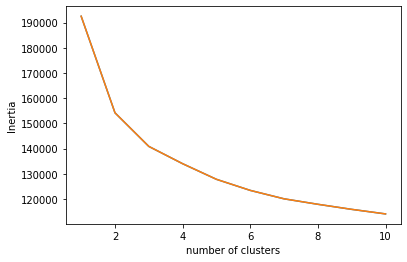

In [117]:
plt.plot(nclusters, inertia)
plt.plot(nclusters, variance)
plt.xlabel('number of clusters')
plt.ylabel('Inertia');

In [82]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = cluster.KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

In [103]:
inertia_scaled = []
for i in range(1,len(nclusters)+1):
  inertia_scaled.append(kMeansRes(scaledgenes.to_numpy(), i, alpha_k=0.03))


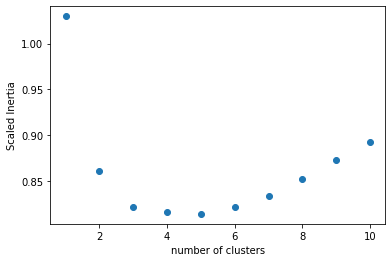

In [110]:
plt.plot(nclusters, inertia_scaled, marker='o', linestyle='')
plt.xlabel('number of clusters')
plt.ylabel('Scaled Inertia');